### Q1.
### **(a)**

 Hamming distance = number of different bits = 3
Jaccard Similarity = number of 1-1 matches /( number of bits - number 0-0
matches) = 2 / 5 = 0.4

In [3]:
# x_1 = list('0101010001')
# x_2 = list('0100011000')

# def jaccard_similarity(list1, list2):
#     s1 = set(list1)
#     s2 = set(list2)
#     return float(len(s1.intersection(s2)) / len(s1.union(s2)))

# jaccard_similarity(x_1, x_2)    

1.0

In [5]:
# import hashlib

# def hamming_distance(chaine1, chaine2):
#     return sum(c1 != c2 for c1, c2 in zip(chaine1, chaine2))

# def hamming_distance2(chaine1, chaine2):
#     return len(list(filter(lambda x : ord(x[0])^ord(x[1]), zip(chaine1, chaine2))))
# x_1 = '0101010001'
# x_2 = '0100011000'
# chaine1 = hashlib.md5(x_1.encode()).hexdigest()
# chaine2 = hashlib.md5(x_2.encode()).hexdigest()

# #chaine1 = "6fb17381822a6ca9b02153d031d5d3da"
# #chaine2 = "a242eace2c57f7a16e8e872ed2f2287d"

# assert len(chaine1) == len(chaine2)

# print(hamming_distance(chaine1, chaine2))

# print(hamming_distance2(chaine1, chaine2))

30
30


### Q1. (b)

 The Hamming distance is similar to the SMC. In fact, SMC = Hamming distance / number of bits.

The Jaccard measure is similar to the cosine measure because both ignore $0-0$ matches.

In [1]:
# ### Q1. (c)
# Jaccard is more appropriate for comparing the genetic makeup of two
# organisms; since we want to see how many genes these two organisms share. 

SyntaxError: invalid syntax (<ipython-input-1-c846bf5cada8>, line 2)

In [ ]:
### Q1. (d)
# Two human beings share >99.9% of the same genes. If we want to
# compare the genetic makeup of two human beings, we should focus on their
# differences. Thus, the Hamming distance is more appropriate in this situation. 






```
# This is formatted as code
```

## Q2


What is the idea/algorithm of K-means clustering, Hierarchical clustering, and DBSCAN? (In other words, how do they work?) What are their strength and weakness? You may use examples. !

### K-means: Problem: 
Given a set $X$ of $n$ points in a $d$ -dimensional space and an integer $\mathrm{K}$ group the points into $\mathrm{K}$ clusters $C=\left\{C_{1}\right.$ such that
$$
\operatorname{Cost}(C)=\sum_{i=1}^{k} \sum_{x \in C_{i}}\left(x-c_{i}\right)^{2}
$$
is minimized, where $c_{i}$ is the mean of the points in cluster

### Hierarchical clustering:
Start with one, all-inclusive cluster
At each step, split a cluster until each cluster contains a point (or there are
k clusters). Traditional hierarchical algorithms use a similarity or
distance matrix

### DBSCAN:
DBSCAN is a Density-Based Clustering algorithm


## strength and weakness

### K-means: 
NP-hard if the dimensionality of the data is at least 2

### Hierarchical clustering:
Do not have to assume any particular number
of clusters;They may correspond to meaningful
taxonomies

### DBSCAN:

DBSCAN is a Density-Based Clustering algorithm


## Q4

In [50]:
# connect to google drive for reading data
from google.colab import drive
drive.mount('/content/gd/')

Drive already mounted at /content/gd/; to attempt to forcibly remount, call drive.mount("/content/gd/", force_remount=True).


In [51]:
%cd /content/gd/MyDrive/6240
%pwd

/content/gd/MyDrive/6240


'/content/gd/MyDrive/6240'

In [52]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [53]:
# read the data
filename = "/content/gd/MyDrive/6240/SocialNetworkAds.csv"
dataset = pd.read_csv(filename)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [54]:
x = dataset.iloc[:,[0,1]].values
y = dataset.iloc[:,2].values

In [55]:
# preparing for training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [56]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
# fitting KNN on the training dataset
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
# prediting the Test set results
Y_pred = classifier.predict(X_test)


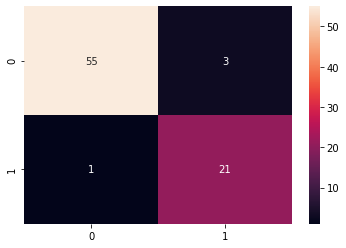

In [59]:
# making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


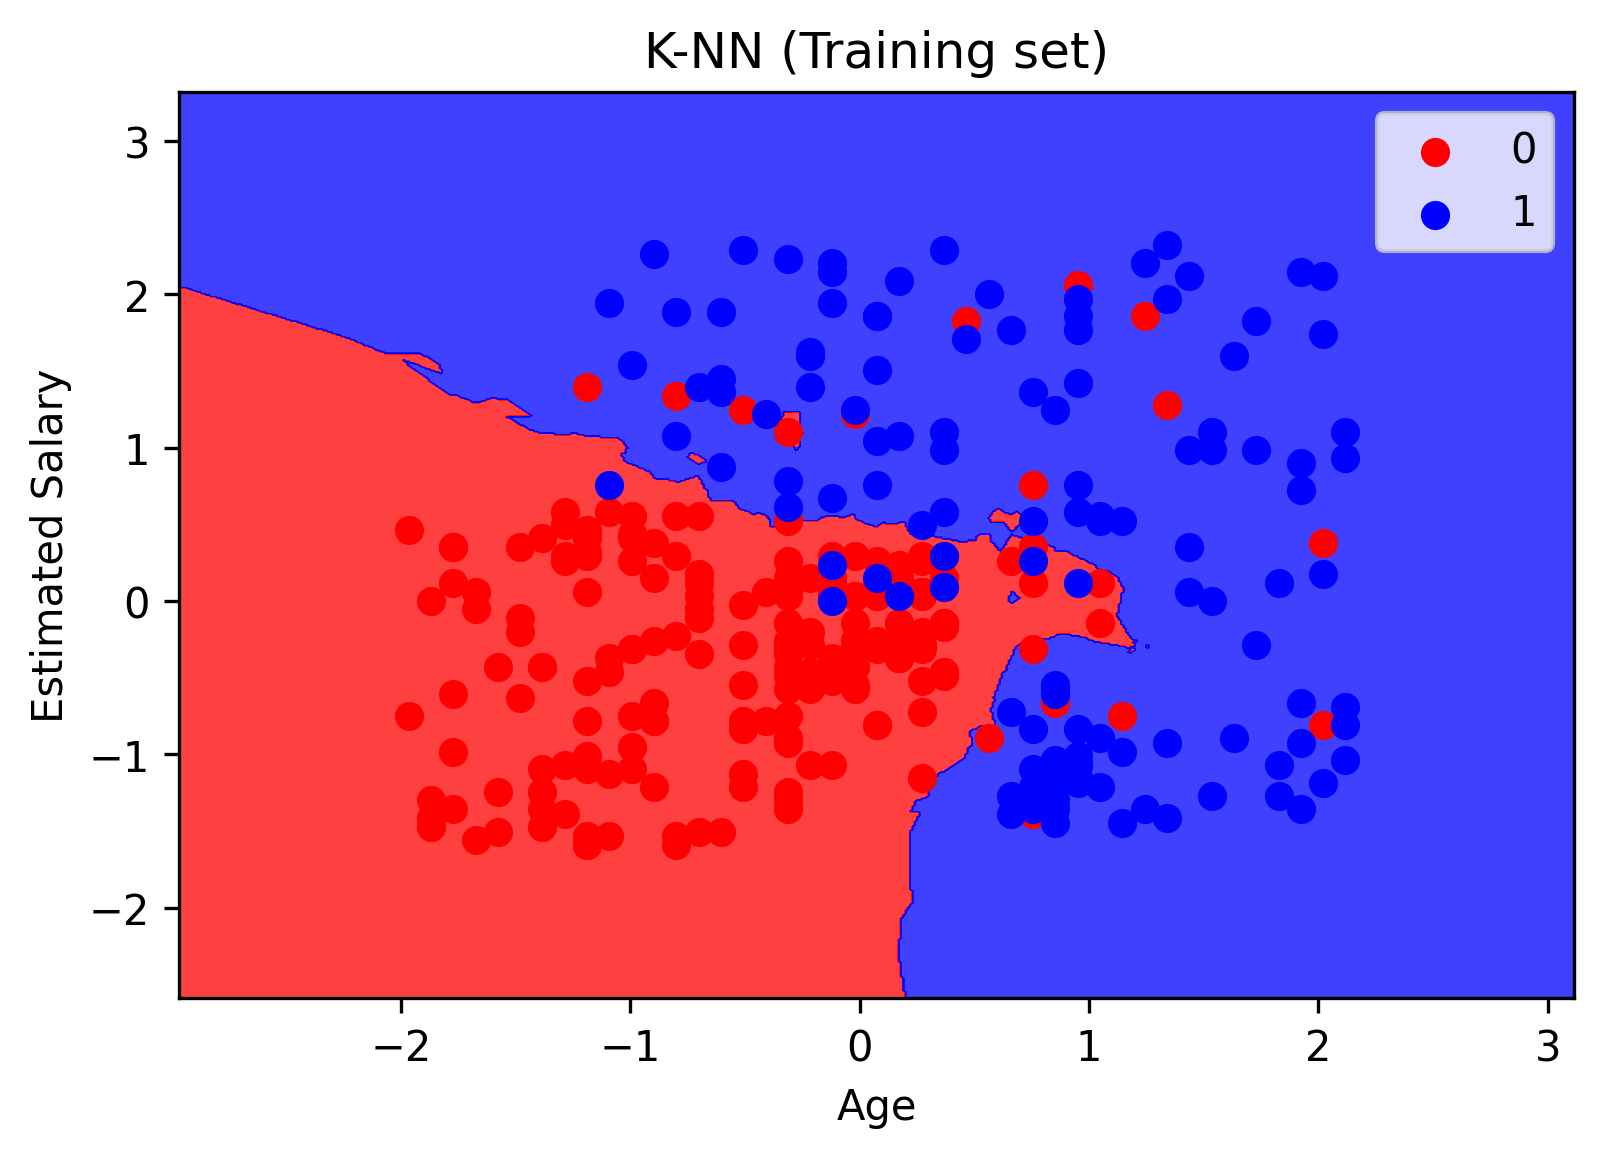

<Figure size 432x288 with 0 Axes>

In [60]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=300, facecolor='w', edgecolor='k')

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()
plt.savefig("KNN_training.png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


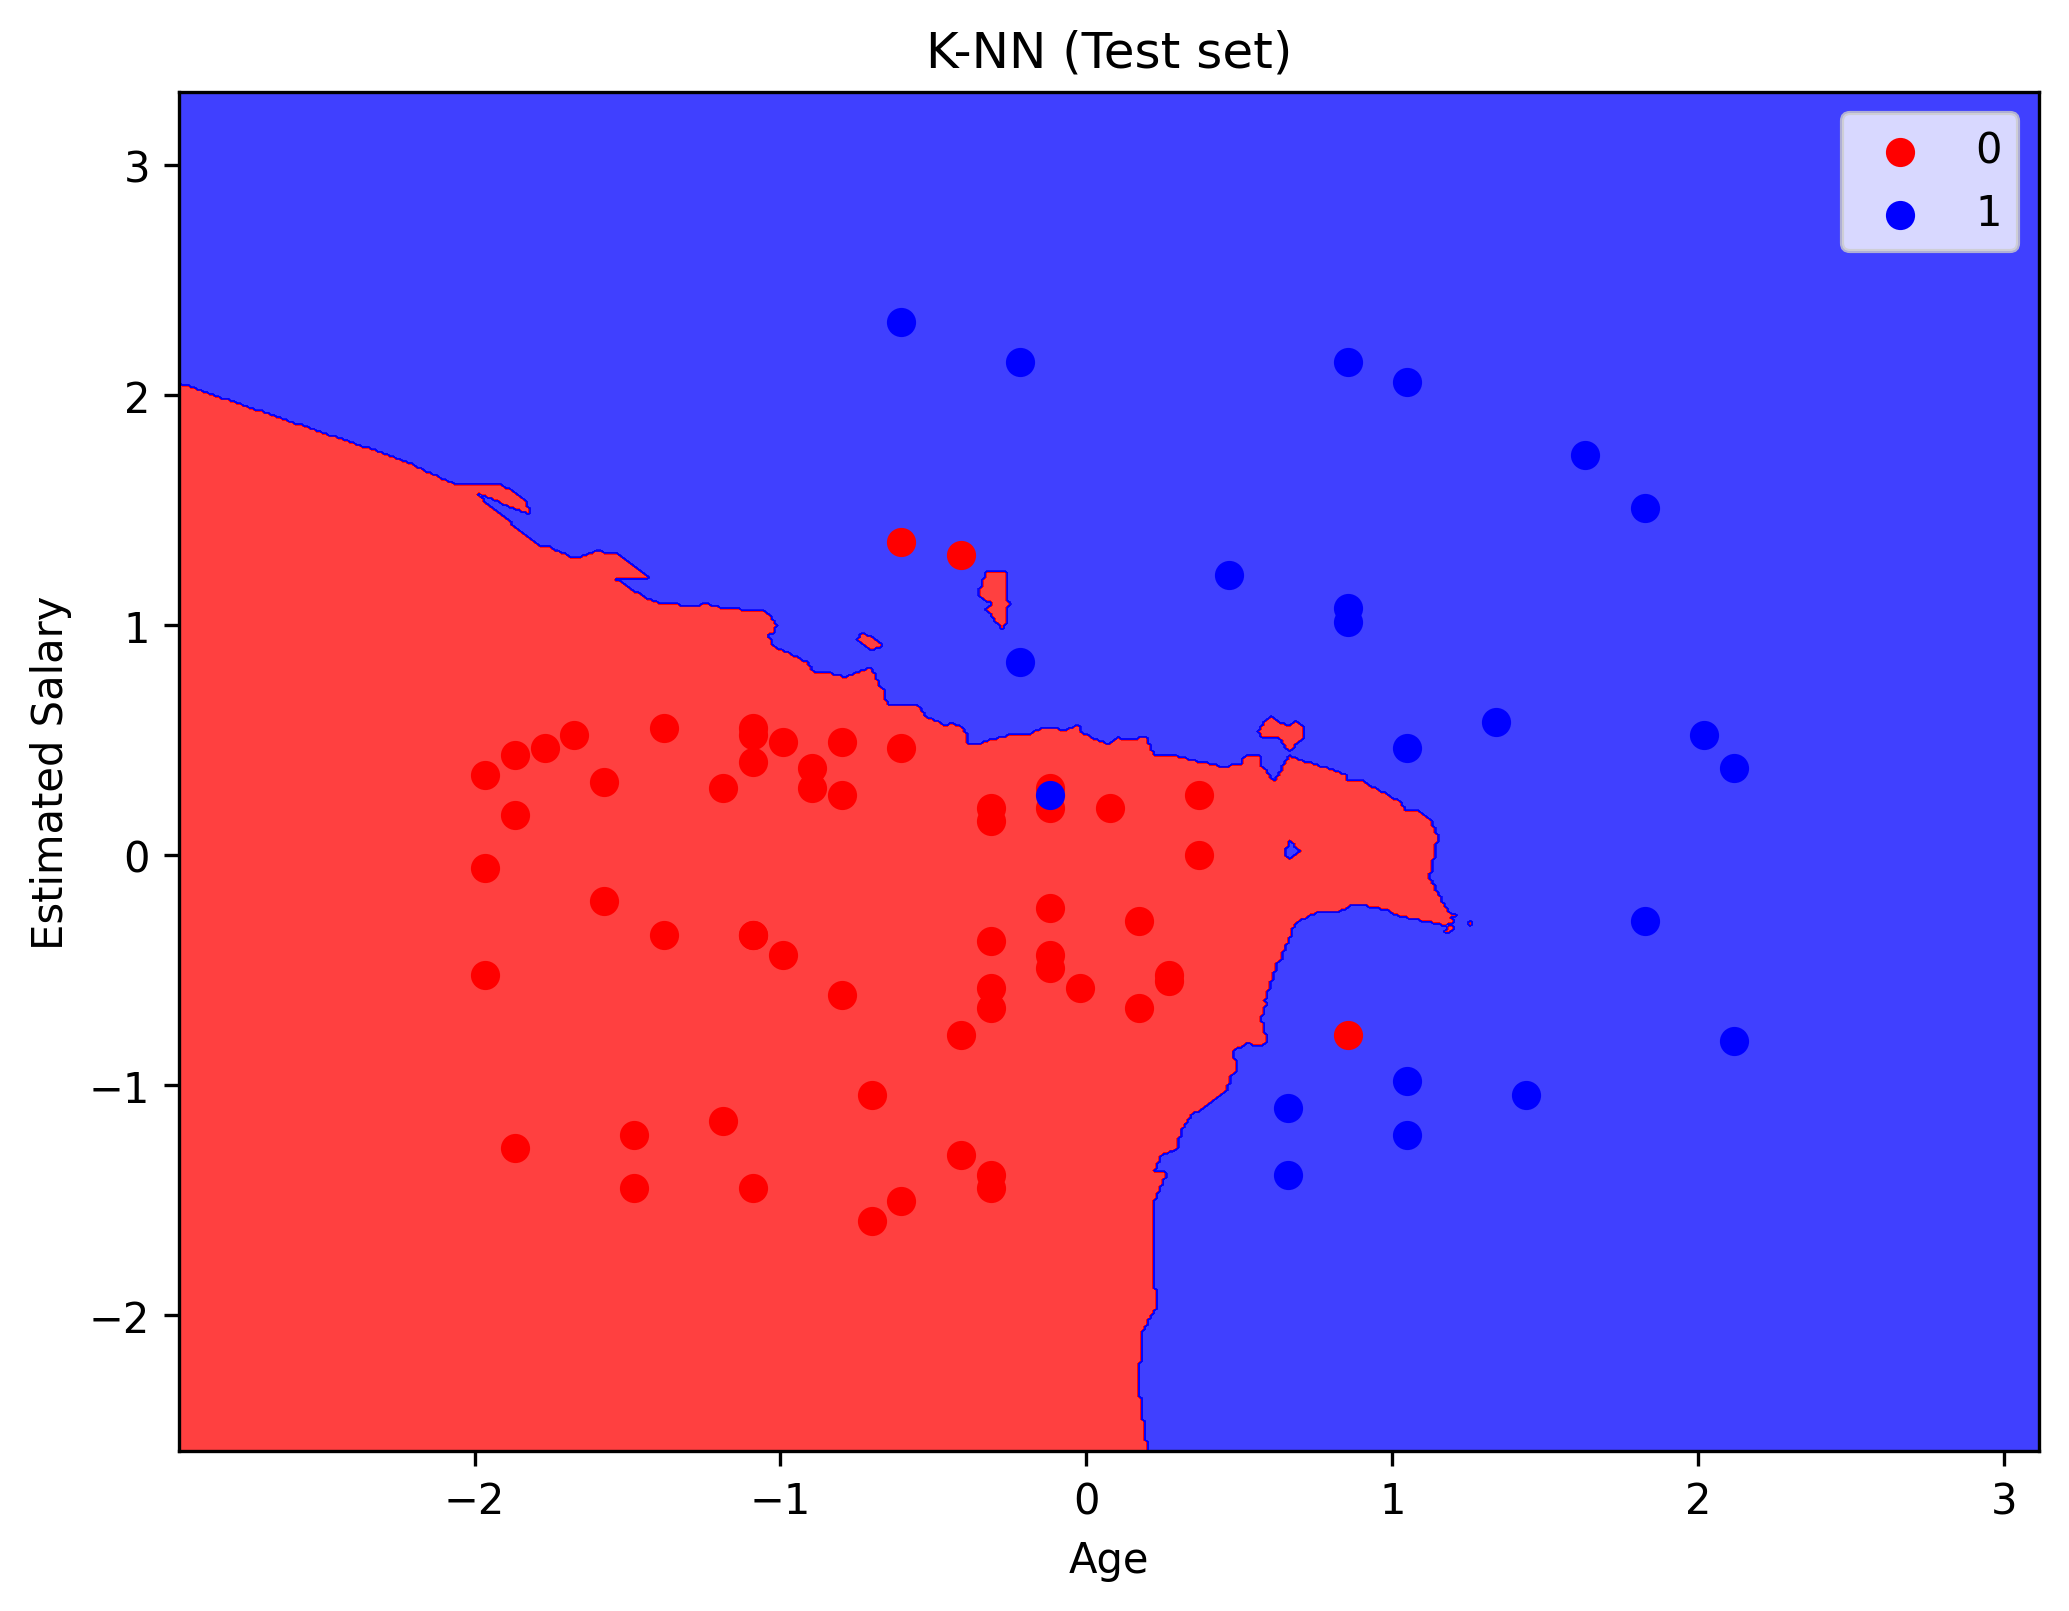

<Figure size 432x288 with 0 Axes>

In [ ]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
plt.savefig("KNN_testing.png")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# precision = precision_score(Y_test, Y_pred, average='binary')
precision = precision_score(Y_test, Y_pred, labels=[1,2], average='micro')
recall = recall_score(Y_test, Y_pred, labels=[1,2], average='micro')
score = f1_score(Y_test, Y_pred, average='binary')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F-Measure: %.3f' % score)

Precision: 0.875
Recall: 0.955
F-Measure: 0.913


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


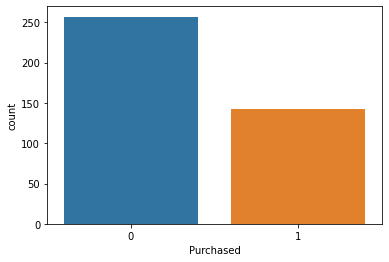

In [ ]:
sns.countplot(x='Purchased', data=dataset)
plt.show()
# the label is slightly imbalanced

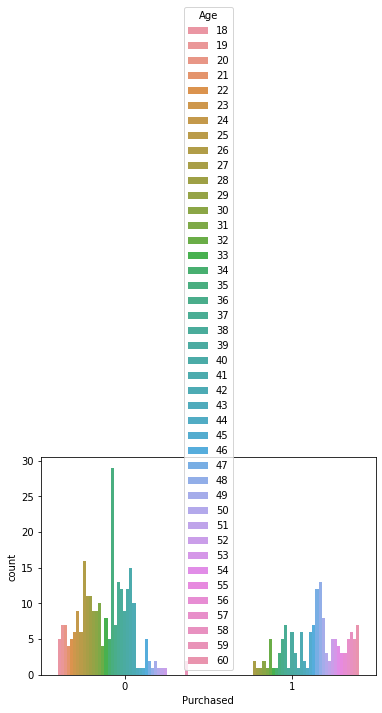

In [ ]:
sns.countplot(x='Purchased', hue='Age', data=dataset)
plt.show()

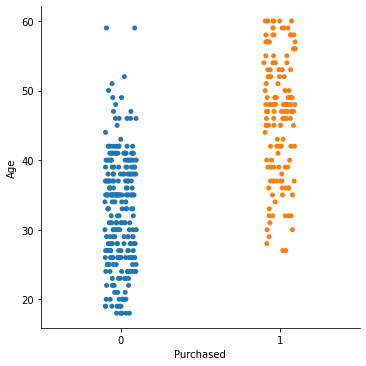

In [ ]:
sns.catplot(x='Purchased', y='Age', data=dataset)
plt.show()

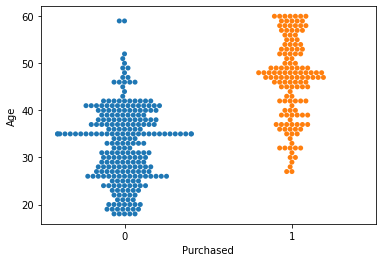

In [ ]:
sns.swarmplot(x="Purchased", y="Age",data=dataset )
plt.show()

In [ ]:
# using polynomial Kernel
from sklearn.svm import SVC
poly_model = SVC(kernel='poly', degree=3)

In [ ]:
poly_model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred_poly = poly_model.predict(X_test)

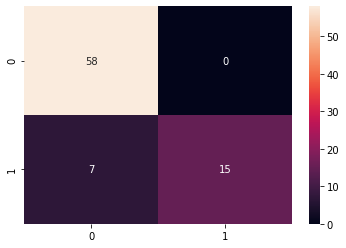

In [ ]:
cf_matrix = confusion_matrix(Y_test, Y_pred_poly)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [ ]:
precision = precision_score(Y_test, Y_pred_poly, labels=[1,2], average='micro')
recall = recall_score(Y_test, Y_pred_poly, labels=[1,2], average='micro')
score = f1_score(Y_test, Y_pred_poly, average='binary')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F-Measure: %.3f' % score)

Precision: 1.000
Recall: 0.682
F-Measure: 0.811


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


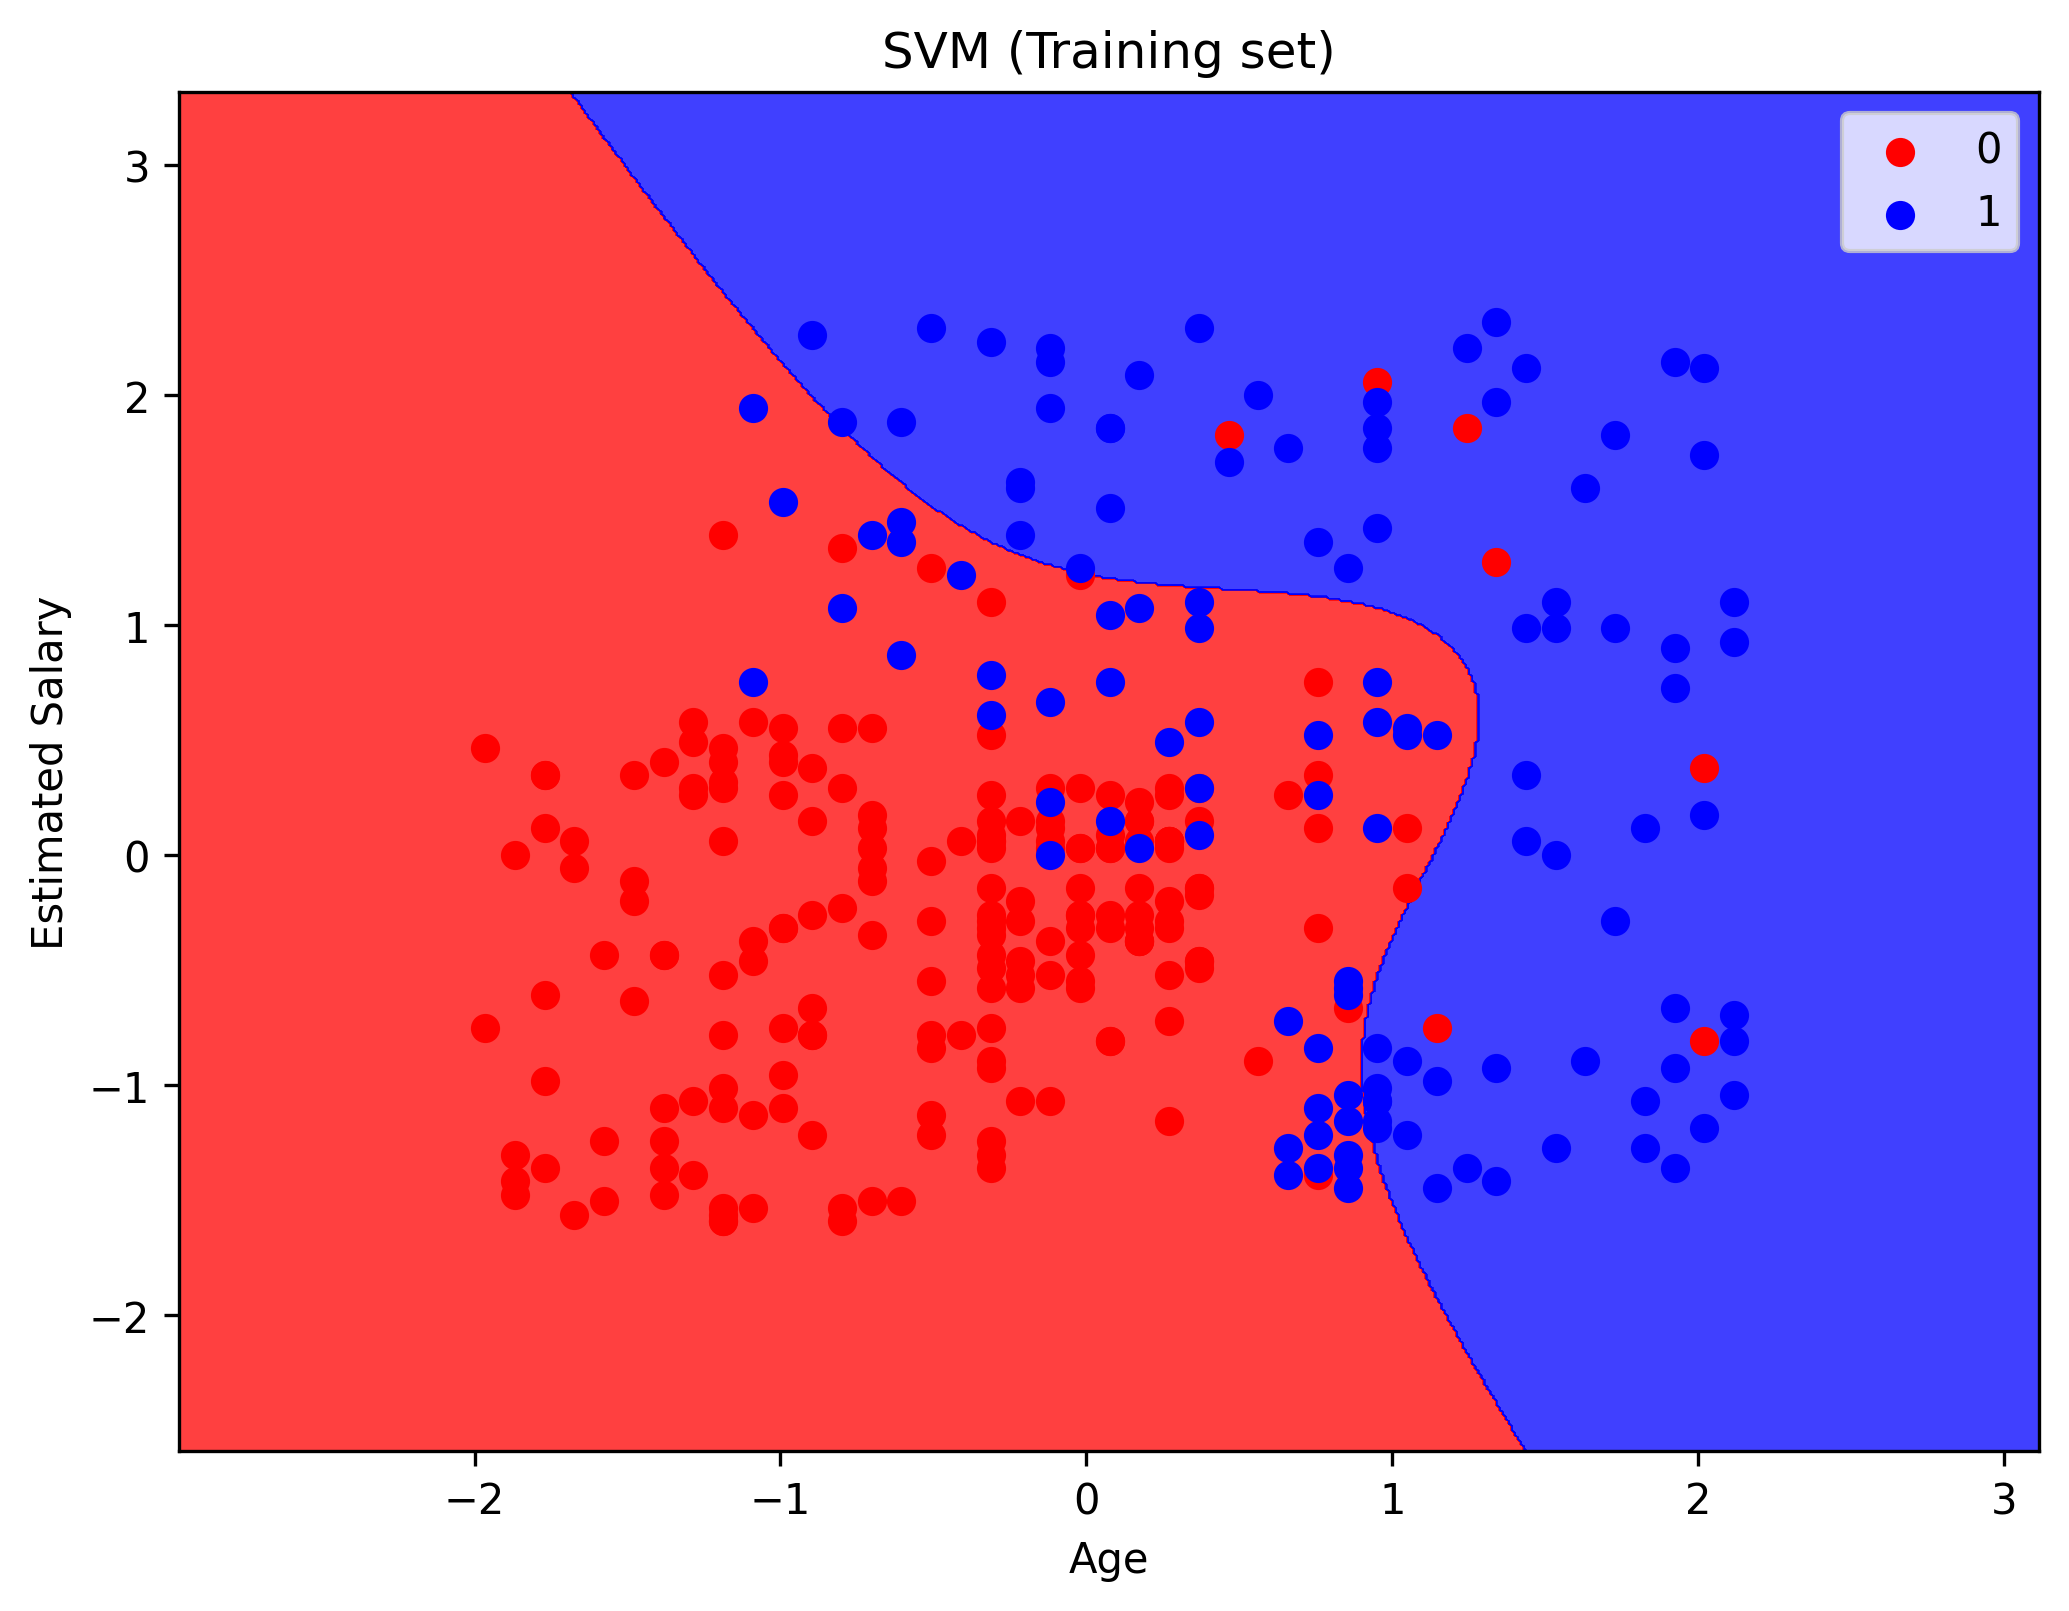

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

plt.contourf(X1, X2, poly_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()
plt.savefig("SVM_training.png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


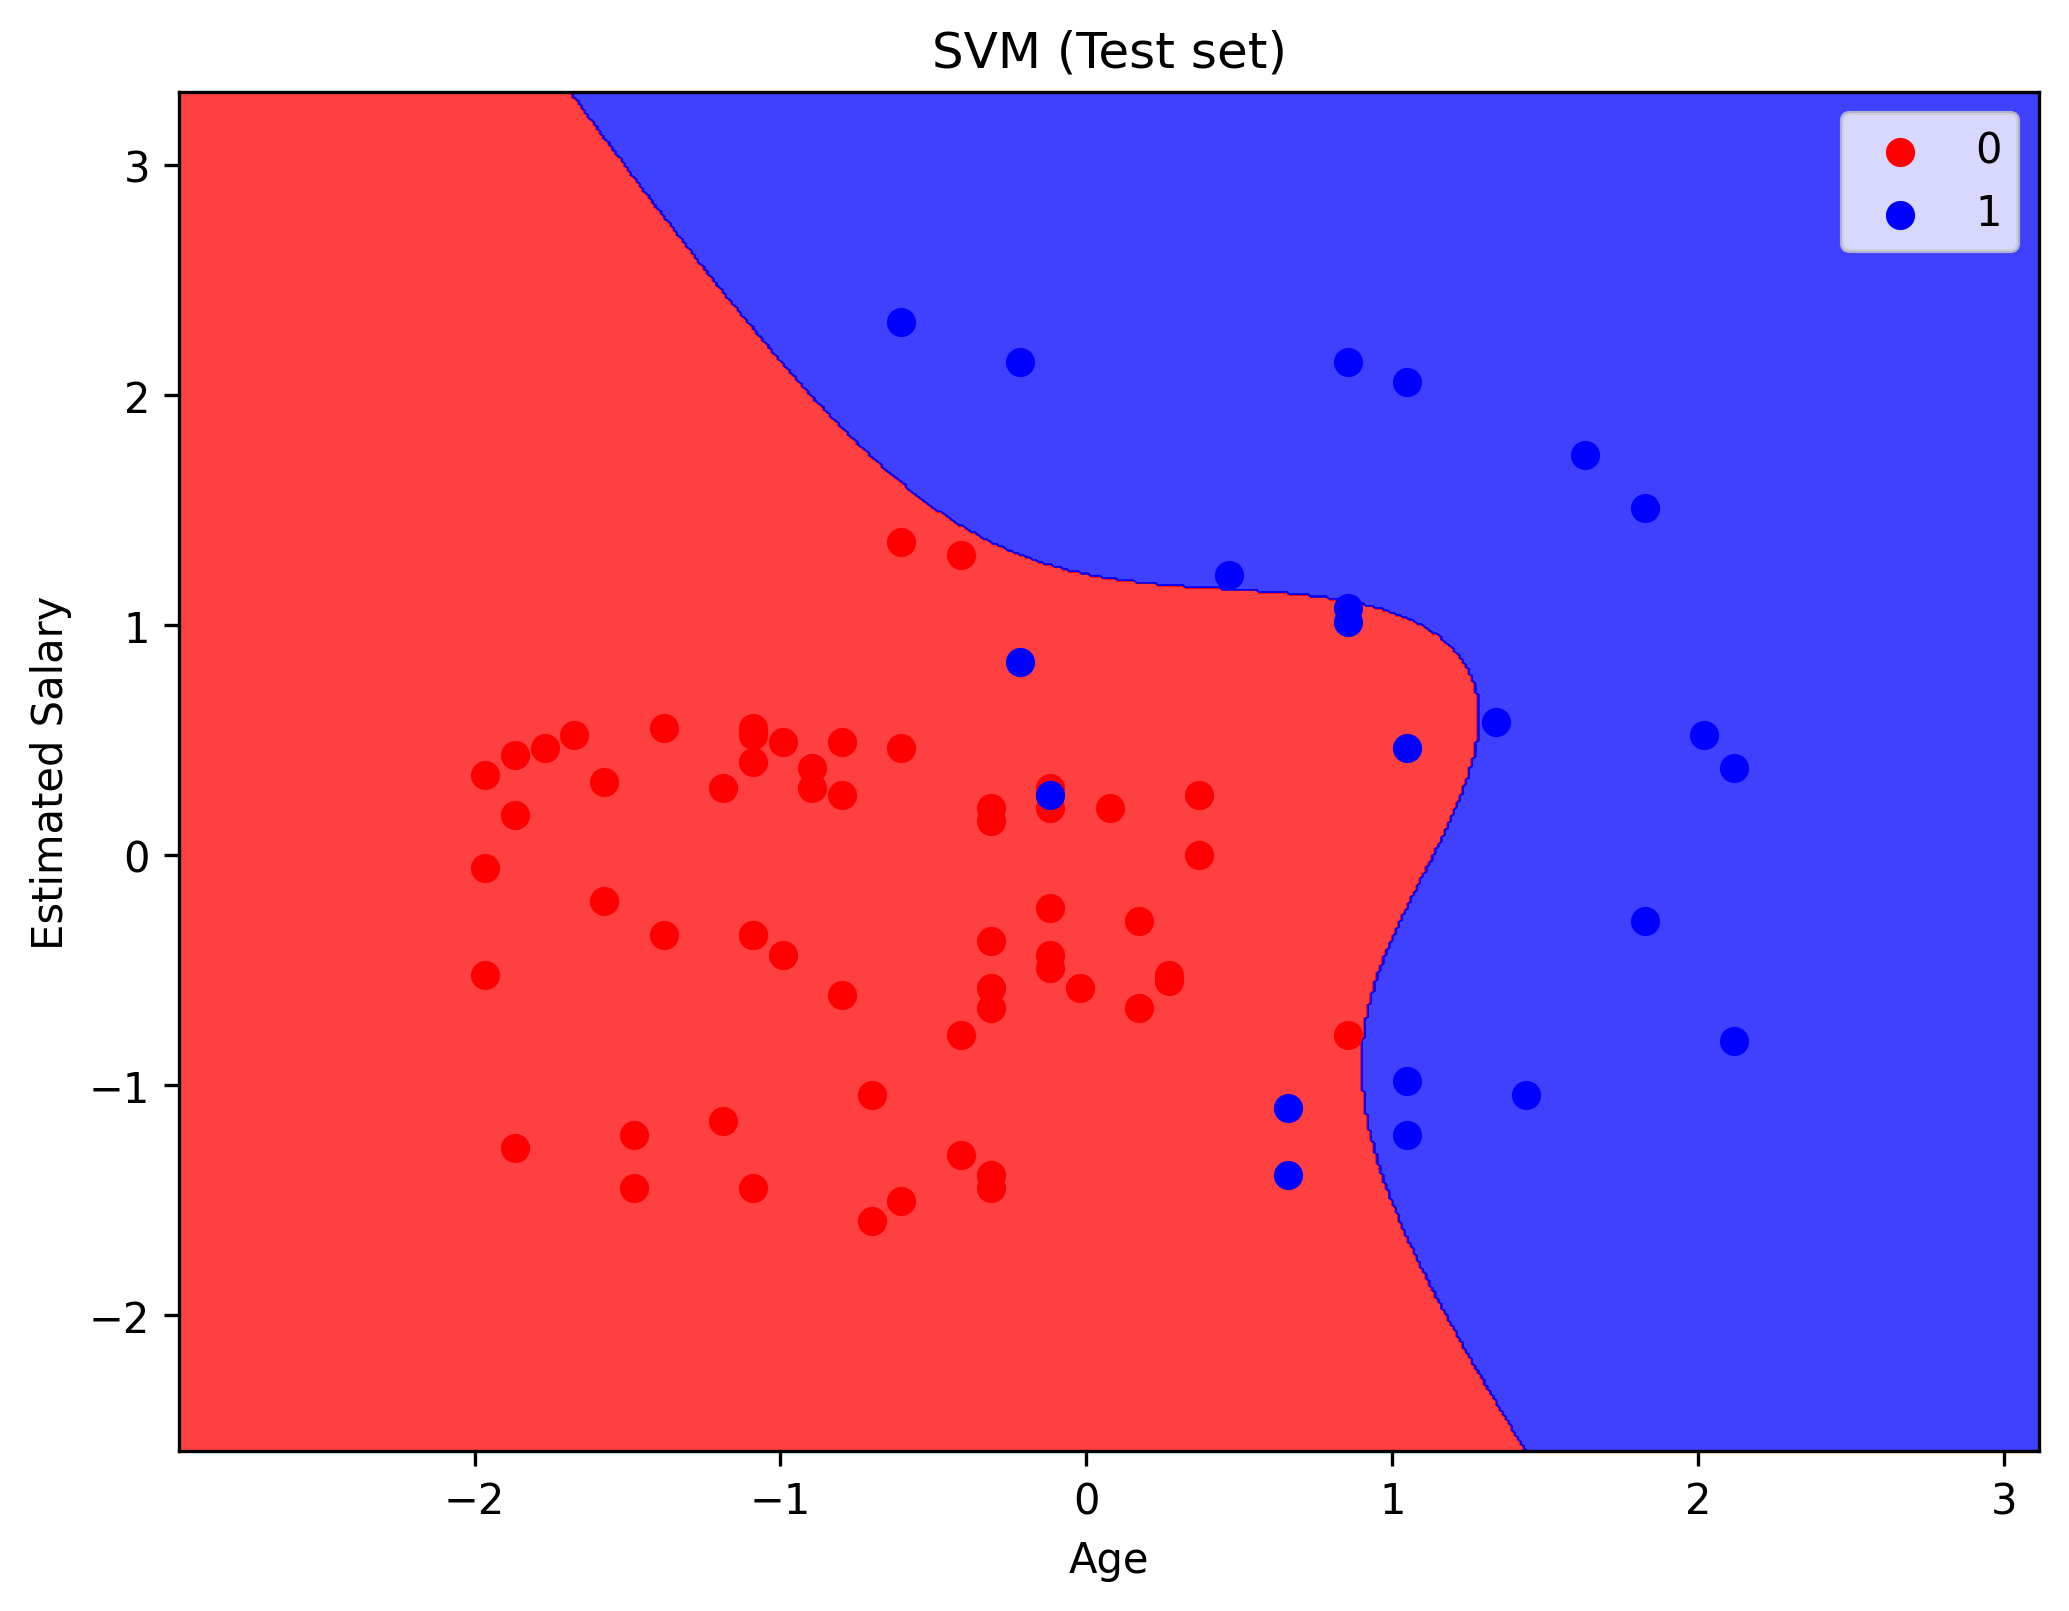

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')

plt.contourf(X1, X2, poly_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
plt.savefig("SVM_testing.png")

## Q3

In [89]:
%pwd

'/content/gd/MyDrive/6240'

In [139]:
filename_clustering = "/content/gd/MyDrive/6240/Clustering1.txt"
data = pd.read_csv(filename_clustering, delim_whitespace=True)

In [140]:
data.head()

,Column1,Column2
0,15.55,28.65
1,14.90,27.55
2,14.45,28.35
3,14.15,28.80
4,13.75,28.05


In [120]:
x = dataset.iloc[:, [0, 1]].values

In [141]:
from sklearn.cluster import KMeans
wcss = []

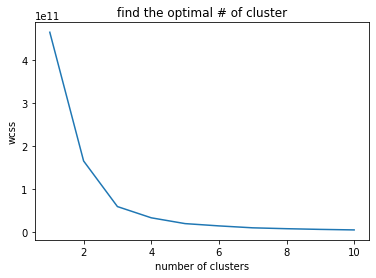

In [122]:
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # intertia_ is an attribute that has the wcss number
plt.plot(range(1,11), wcss)
plt.title("find the optimal # of cluster")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [133]:
# Apply kmeans to the dataset
kmeans = KMeans(n_clusters = 2, max_iter = 300, init = 'k-means++', n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x) #predict which cluster each point belongs to
y_kmeans

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,

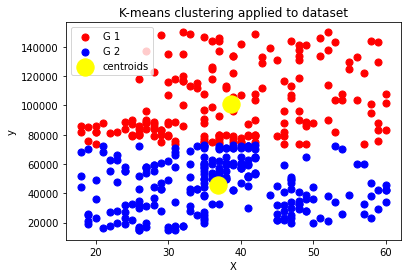

In [134]:

plt.figure(2)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'G 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'G 2')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'G 3')
# plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'G 4')
# plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 50, c = 'purple', label = 'G 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering applied to dataset")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

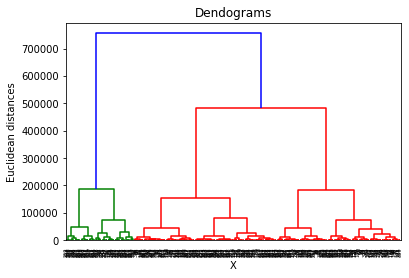

In [125]:
#Use dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram_1 = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendograms')
plt.xlabel('X')
plt.ylabel('Euclidean distances')
plt.show()
# ward method tries to minimize variance between clusters


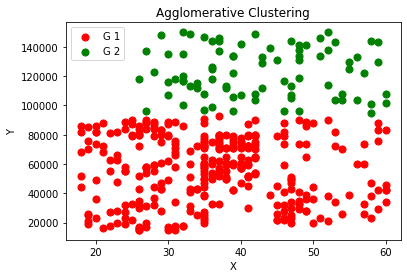

In [132]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'red', label = 'G 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'green', label = 'G 2')
# plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'blue', label = 'G 3')
# plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'purple', label = 'G 4')
# plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange', label = 'G 5')
plt.title('Agglomerative Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [127]:
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.cluster import KMeans, MeanShift, DBSCAN, Birch
from sklearn import metrics

In [128]:
data

,Column1,Column2
0,1.85,27.80
1,1.35,26.65
2,1.40,23.25
3,0.85,23.05
4,0.50,22.35
...,...,...
235,7.50,26.20
236,7.50,25.65
237,7.05,25.85
238,6.90,27.15


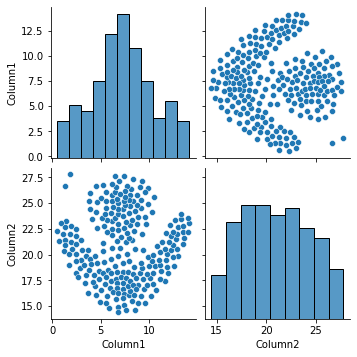

In [129]:
sns.pairplot(data)
plt.show()

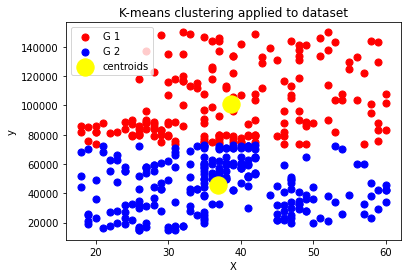

In [135]:
# Apply kmeans to the dataset
kmeans = KMeans(n_clusters = 2, max_iter = 300, init = 'k-means++', n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x) #predict which cluster each point belongs to
plt.figure(2)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'G 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'G 2')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'G 3')
# plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'G 4')
# plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 50, c = 'purple', label = 'G 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering applied to dataset")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


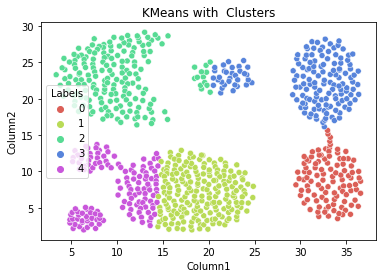

In [143]:
# 3 cluster
km3 = KMeans(n_clusters=5).fit(data)

data['Labels'] = km3.labels_
plt.figure(figsize=(6, 4))
sns.scatterplot(data['Column1'], data['Column2'], hue=data['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with  Clusters')
plt.show()